# Raghavendra Kharosekar


# Prediction using Unsupervised ML

From the given ‘Iris’ dataset, we predict the optimum number of clusters and also develop a visual representation.

**Import all the necessary libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

**Loading the IRIS Dataset**

In [11]:
df=pd.read_csv('Iris.csv',header=0)
df.drop(columns=['Id'], inplace=True)
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


**Basic Information**

In [12]:
df.shape

(150, 5)

In [13]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


We can see that there are no null values

**Data Cleaning**

In [19]:
df=df.drop_duplicates()
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


We drop the 3 duplicate values with new shape as 147×5 

In [25]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

**Plotting graphs to visualize the data:**

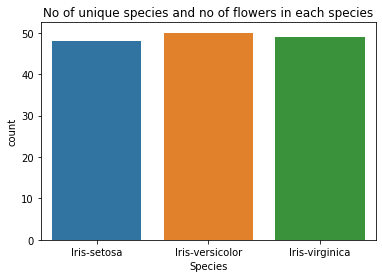

In [27]:
#Bar Graph of Species wise classification
sns.countplot(df['Species'])
plt.title('No of unique species and no of flowers in each species')
plt.show()

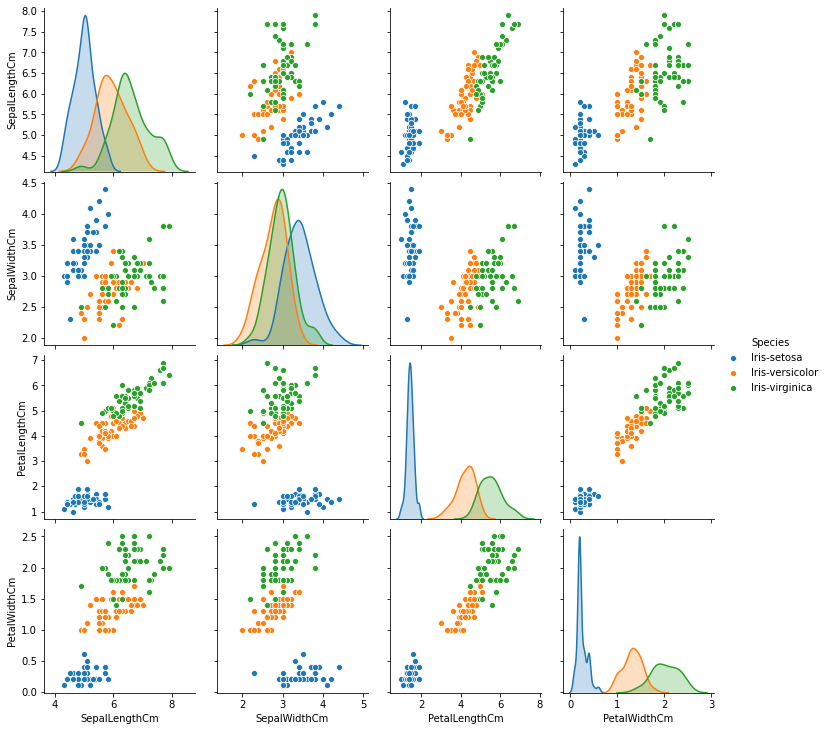

In [20]:
sns.pairplot(df, hue = 'Species')
plt.show()

**Training the Dataset using Kmeans Algorithm**

In [37]:
variables=df.drop('Species',axis=1)
variables.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(variables)
    wcss.append(kmeans.inertia_)

We now plot the Elbow Method to find the Elbow

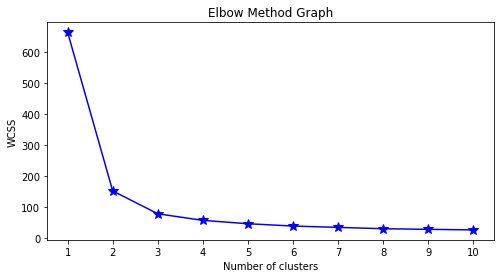

In [45]:
plt.figure(figsize=(8,4))
plt.plot(range(1,11), wcss, marker='*', markersize=10,color='Blue')
plt.title('Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1, 11))
plt.ylabel('WCSS')
plt.show()

As you can see in the above graph there is a massive drop in the value of WCSS from 2 to 4 this region forms the elbow of the graph and thus we can conclude that 3 clusters would be optimum for our algorithm

**Now we can train our model with optimum clusters**

In [53]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10)
predictions = kmeans.fit_predict(variables)
df['Cluster Number'] = predictions
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster Number
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


**Visualising the Points using scatter plot**

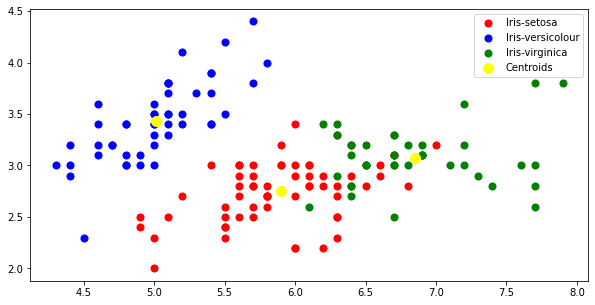

In [59]:
df_0 = df[df['Cluster Number'] == 0]
df_1 = df[df['Cluster Number'] == 1]
df_2 = df[df['Cluster Number'] == 2]

plt.figure(figsize=(10,5))

plt.scatter(df_0.iloc[:, 0], df_0.iloc[:, 1] , color = 'Red', label = 'Iris-setosa', s= 50)
plt.scatter(df_1.iloc[:, 0], df_1.iloc[:, 1] , color = 'Blue', label = 'Iris-versicolour', s= 50)
plt.scatter(df_2.iloc[:, 0], df_2.iloc[:, 1] , color = 'Green', label = 'Iris-virginica', s= 50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'Yellow', label = 'Centroids', s = 100)

plt.legend()

Thus we have successfully predicted the optimum number of clusters for the given dataset with the help of Unsupervised Machine Learning and visualised the same.